# kNN, Метод опорных векторов, Дерево решений

In [35]:
# !pip install numpy
# !pip install matplotlib
# !pip install sklearn

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

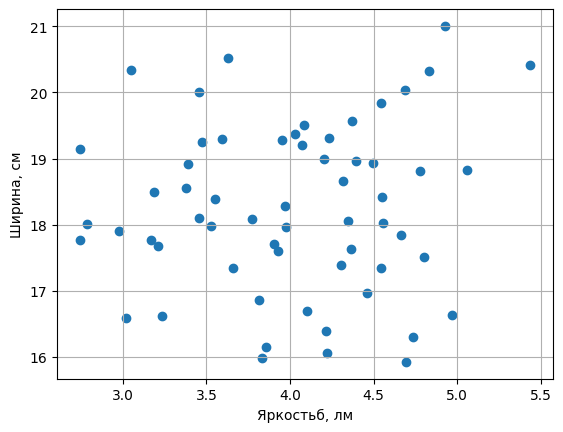

In [37]:
N_NEIGHBORS = 5

LIGHT_AVG = 4
LIGHT_DISTORTION = 2
x_light = (LIGHT_DISTORTION / 3) * np.random.randn(60) + LIGHT_AVG

WIDTH_AVG = 18
WIDTH_DISTORION = 4
y_width = (WIDTH_DISTORION / 3) * np.random.randn(60) + WIDTH_AVG

plt.scatter(x_light, y_width)
plt.xlabel('Яркостьб, лм')
plt.ylabel('Ширина, см')
plt.grid()
plt.show()

In [38]:
salmon = np.stack((x_light, y_width), axis=-1)

X_OFFSET = 3
Y_OFFSET = 0
seabass = salmon + np.array([X_OFFSET, Y_OFFSET])

(60, 2) (60, 2)


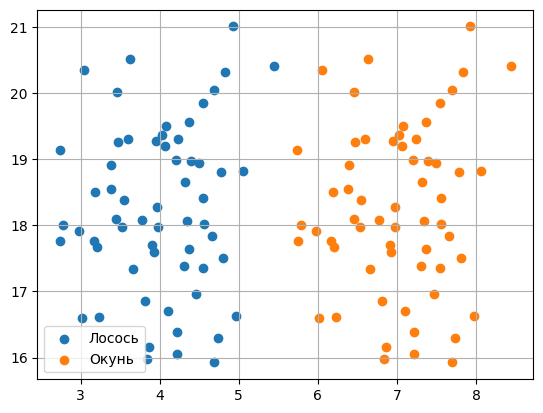

In [39]:
print(salmon.shape, seabass.shape)

plt.scatter(salmon[:, 0], salmon[:, 1])
plt.scatter(seabass[:, 0], seabass[:, 1])

legends = ['Лосось', 'Окунь']
plt.legend(legends)
plt.grid()
plt.show()

In [40]:
XY = np.vstack([salmon, seabass])

annotation1 = [0] * 60
annotation2 = [1] * 60
annotations = annotation1 + annotation2

data, ident = shuffle(XY, annotations)

In [41]:
TEST_SIZE = int(len(data) * 0.4)

x_train = data[:TEST_SIZE]
x_test = data[TEST_SIZE:]

y_train = ident[:TEST_SIZE]
y_test = ident[TEST_SIZE:]

# kNN

In [42]:
clf = KNeighborsClassifier(N_NEIGHBORS, weights='uniform')
clf.fit(x_train, y_train)

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

x_lim = np.arange(x_min, x_max, .01)
y_lim = np.arange(y_min, y_max, .01)

xx, yy = np.meshgrid(x_lim, y_lim)

In [43]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Точность: 1.000


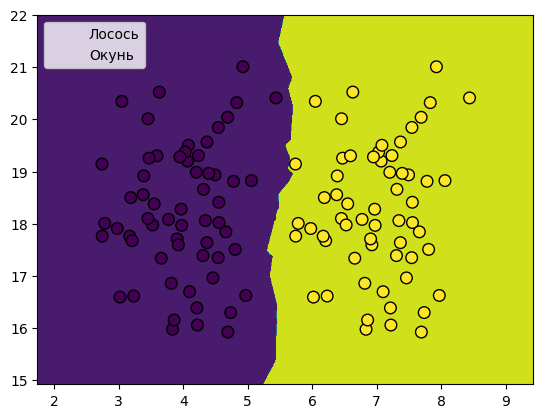

In [44]:
plt.contourf(xx, yy, Z)
scatter = plt.scatter(data[:, 0], data[:, 1], c=ident, edgecolors="black", s=70)
handles = scatter.legend_elements()[0]
legends = ['Лосось', 'Окунь']
plt.legend(legends)

result = clf.predict(x_test)
print('Точность: {0:.3f}'.format(accuracy_score(y_test, result)))

plt.show()

In [45]:
neighbors = np.arange(3, 12)
accuracy = np.empty(len(neighbors))

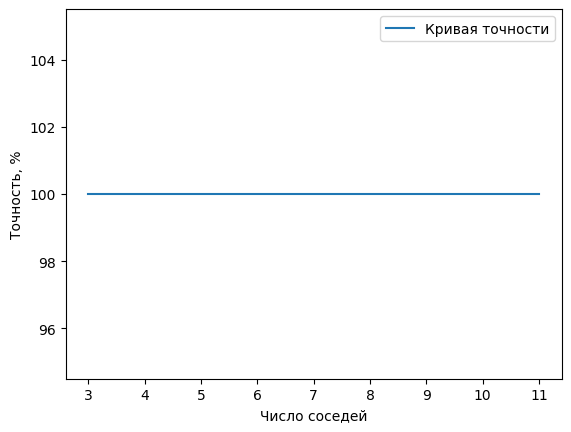

In [46]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    accuracy[i] = 100 * knn.score(x_test, y_test)

plt.plot(neighbors, accuracy, label='Кривая точности')
plt.legend()
plt.xlabel('Число соседей')
plt.ylabel('Точность, %')

plt.show()

# SVM

Точность: 1.000


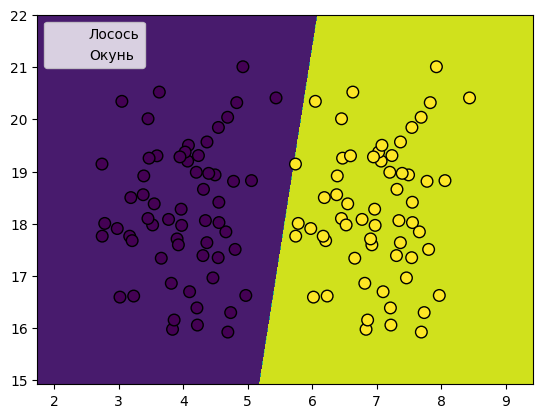

In [47]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
scatter = plt.scatter(data[:, 0], data[:, 1], c=ident, edgecolors="black", s=70)
handles = scatter.legend_elements()[0]
legends = ['Лосось', 'Окунь']
plt.legend(legends)

result = clf.predict(x_test)
print('Точность: {0:.3f}'.format(accuracy_score(y_test, result)))

plt.show()

# Decision tree

[Text(0.5, 0.75, 'Лосось <= 5.421\ngini = 0.497\nsamples = 48\nvalue = [22, 26]\nclass = Окунь'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = Лосось'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = Окунь')]

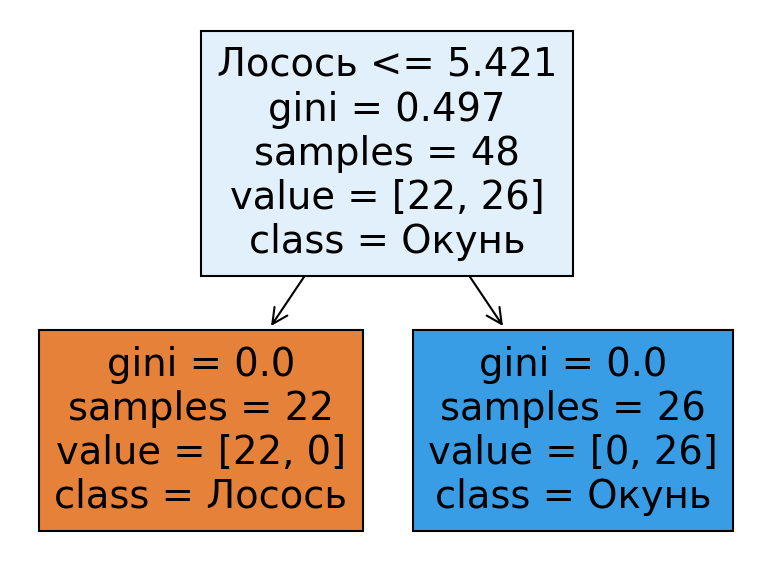

In [48]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

fig, axes = plt.subplots(dpi=150)
plot_tree(clf, feature_names=legends, class_names=legends, filled=True)

Точность: 0.986


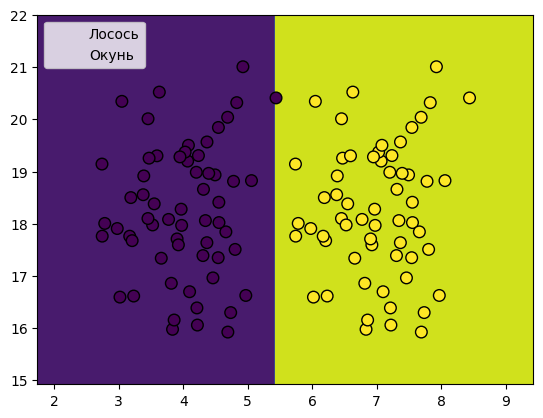

In [49]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

x_lim = np.arange(x_min, x_max, .01)
y_lim = np.arange(y_min, y_max, .01)

xx, yy = np.meshgrid(x_lim, y_lim)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
scatter = plt.scatter(data[:, 0], data[:, 1], c=ident, edgecolors="black", s=70)
handles = scatter.legend_elements()[0]
legends = ['Лосось', 'Окунь']
plt.legend(legends)

result = clf.predict(x_test)
print('Точность: {0:.3f}'.format(accuracy_score(y_test, result)))

plt.show()

In [51]:
def draw_graph(clf):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z)
    scatter = plt.scatter(data[:, 0], data[:, 1], c=ident, edgecolors="black", s=70)
    legends = ['Лосось', 'Окунь']
    plt.legend(legends)

    plt.show()

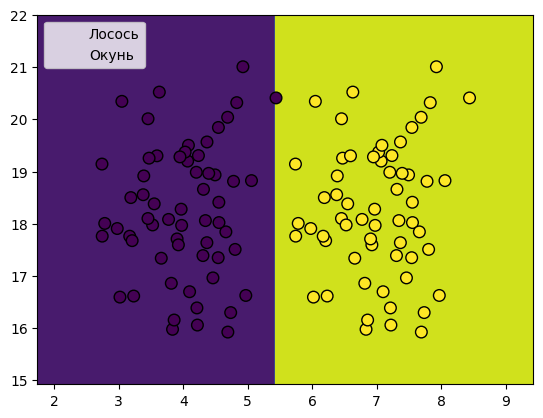

In [52]:
draw_graph(clf)